In [43]:
#Importing Libraries to be used
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression,LinearRegression
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [44]:
#Load the dataset into a Pandas DataFrame and display the first 5 rows.
data = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Storage box\HRDataset_v14.csv")
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [45]:
#Check the shape of the dataset (rows, columns).
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns")

The dataset has 311 rows and 36 columns


In [46]:
#Display the column names and their data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [47]:
#Find the number of unique values in each column.
data.nunique()

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
DateofTermination              96
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceSco

In [48]:
#Identify missing values in the dataset and list columns with nulls.
data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [49]:
#Identying missing rows in the manager column and filling it as we have manager name
missing_managerid = data[data['ManagerID'].isnull()]
print(missing_managerid)

# it was noted that the missing manager name was Webster Butler  hence the corresponding managerID was filled with managerID 39.0
data['ManagerID'] = data['ManagerID'].fillna(39.0)

          Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
19        Becker, Scott  10277          0                0         1   
30   Buccheri, Joseph    10184          0                0         1   
44    Chang, Donovan  E  10154          0                0         1   
88      Fancett, Nicole  10136          0                0         0   
135     Hutter, Rosalie  10214          0                3         0   
177   Manchester, Robyn  10077          1                1         0   
232     Rivera, Haley    10011          1                1         0   
251      Sewkumar, Nori  10071          0                0         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
19             3       5            3                       0   53250  ...   
30             1       5            3                       0   65288  ...   
44             1       5            3                       0   60380  ...   
88             1       5            3  

In [50]:
#Describe the numerical columns (mean, median, std).
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmpID,311.0,10156.000000,89.922189,10001.00,10078.50,10156.00,10233.5,10311.0
MarriedID,311.0,0.398714,0.490423,0.00,0.00,0.00,1.0,1.0
MaritalStatusID,311.0,0.810289,0.943239,0.00,0.00,1.00,1.0,4.0
GenderID,311.0,0.434084,0.496435,0.00,0.00,0.00,1.0,1.0
EmpStatusID,311.0,2.392283,1.794383,1.00,1.00,1.00,5.0,5.0
DeptID,311.0,4.610932,1.083487,1.00,5.00,5.00,5.0,6.0
PerfScoreID,311.0,2.977492,0.587072,1.00,3.00,3.00,3.0,4.0
FromDiversityJobFairID,311.0,0.093248,0.291248,0.00,0.00,0.00,0.0,1.0
Salary,311.0,69020.684887,25156.636930,45046.00,55501.50,62810.00,72036.0,250000.0
Termd,311.0,0.334405,0.472542,0.00,0.00,0.00,1.0,1.0


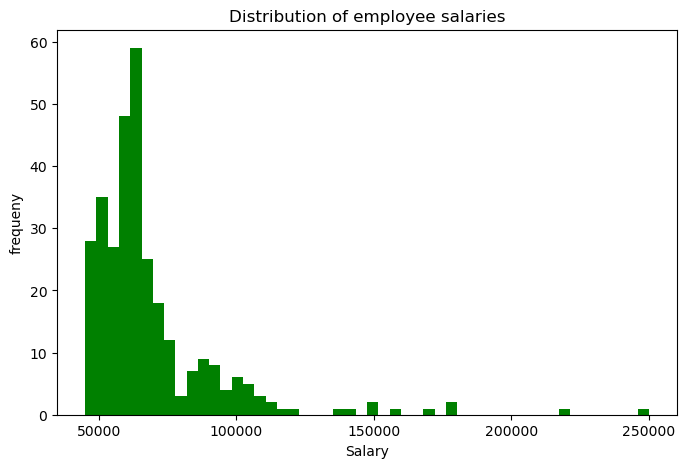

In [51]:
#Find the distribution of employee salaries.
x = data['Salary']

plt.figure(figsize=(8,5))
plt.hist(x=x, bins=50, color="green")
plt.xlabel("Salary")
plt.ylabel("frequeny")
plt.title("Distribution of employee salaries")
plt.show()

In [85]:
#What is the average age of employees at the company? (Use DOB column).
data['DOB'] = pd.to_datetime(data['DOB'], errors="coerce")
data['YOB'] = data['DOB'].dt.year

current_year = pd.Timestamp.today().year
data['Age'] = current_year - data['YOB']

average_age = data['Age'].mean()
print("Average age:", average_age)


Average age: 17.14790996784566


In [53]:
#How many employees are still employed vs terminated?
print(data['EmploymentStatus'].value_counts())


EmploymentStatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64


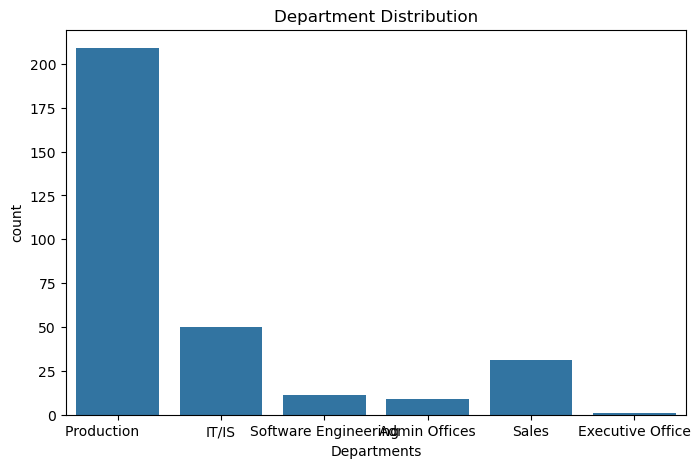

In [54]:
#Which departments have the most employees?
x = data['Department']

plt.figure(figsize=(8,5))
sns.countplot(x=x)
plt.xlabel("Departments")
plt.ylabel("count")
plt.title("Department Distribution")
plt.show()

#from the graph the production department had the most employees with about 205 employees, followed by IT/IS departments who had about 50 employees 

### Business Analysis

In [55]:
#What is the average salary per department?
avg_per_dpt = data.groupby('Department')['Salary'].mean().sort_values(ascending=False)
print(avg_per_dpt)

Department
Executive Office        250000.000000
IT/IS                    97064.640000
Software Engineering     94989.454545
Admin Offices            71791.888889
Sales                    69061.258065
Production               59953.545455
Name: Salary, dtype: float64


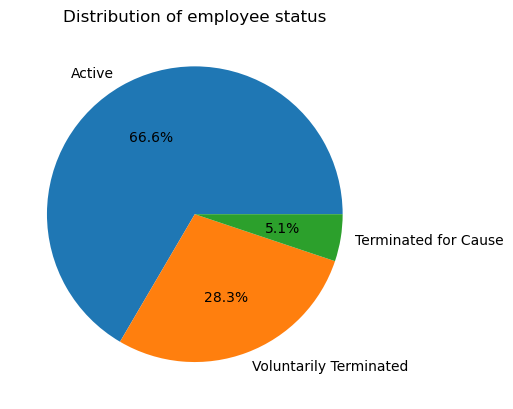

In [56]:
#Find the distribution of employment status (Active, Voluntarily Terminated, etc.).
count = data['EmploymentStatus'].value_counts()

plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title("Distribution of employee status")
plt.show()



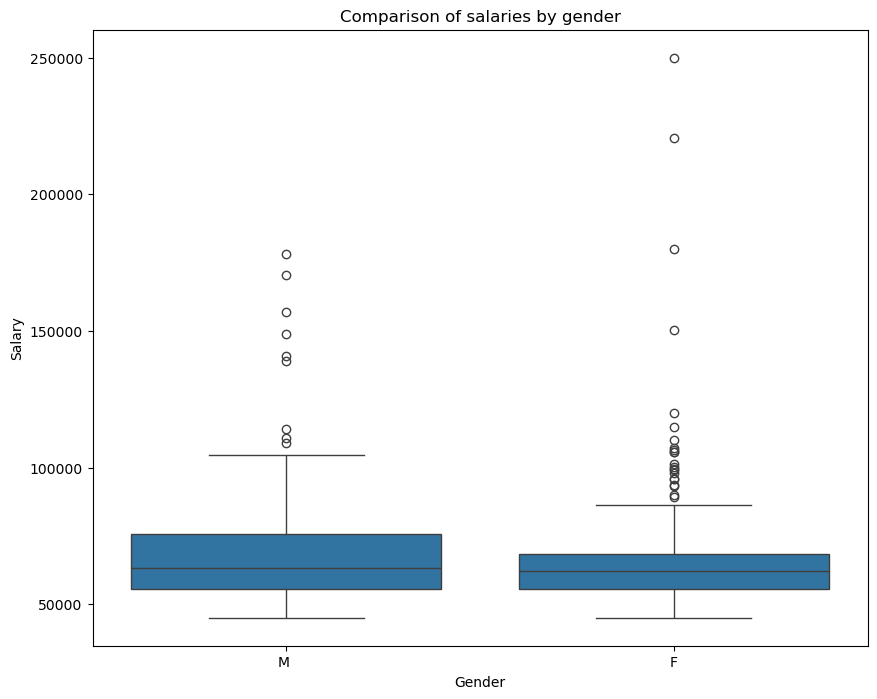

In [57]:
#Compare salary levels between Male and Female employees.
x = data['Sex']
y = data['Salary']

plt.figure(figsize=(10,8))
sns.boxplot(x=x, y=y, data=data)
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.title("Comparison of salaries by gender")
plt.show()

In [58]:

#Which recruitment source brings in the most employees?
count_source = data['RecruitmentSource'].value_counts()
print(count_source)

RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64


In [59]:
#What percentage of employees attended a Diversity Job Fair?
pct_diversity_job_fair = (data["FromDiversityJobFairID"].mean())*100
print(pct_diversity_job_fair)

9.32475884244373


C:\Users\User\AppData\Local\Temp\ipykernel_6564\3956694922.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x, y=y, data=data, ci=None)


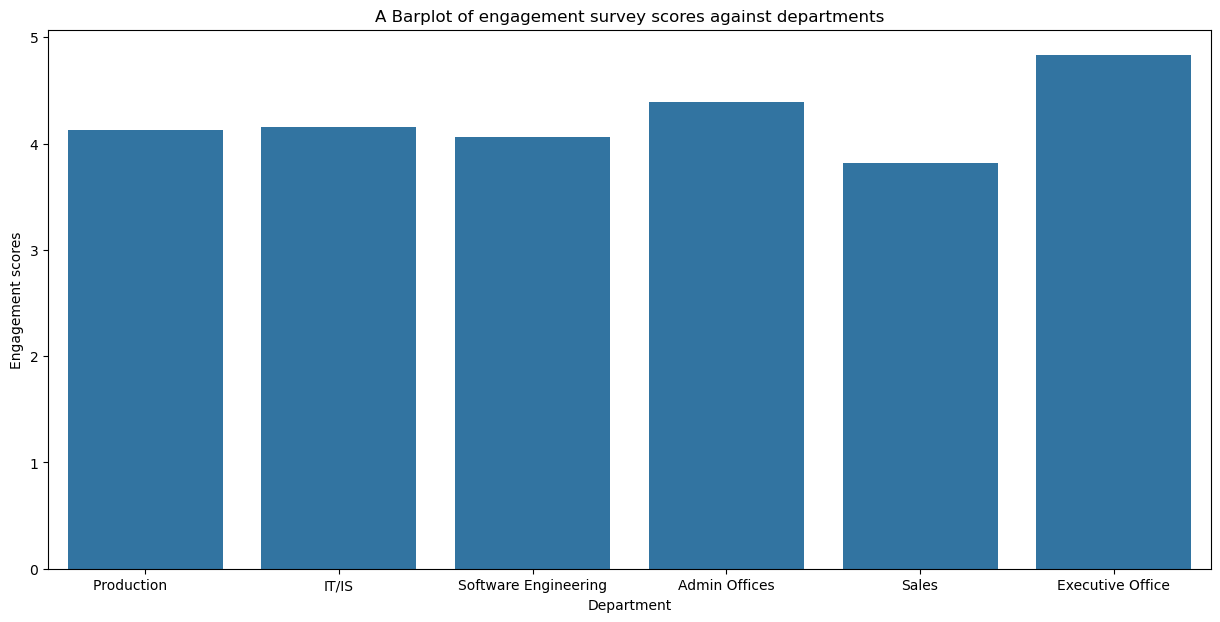

In [60]:
#Compare engagement survey scores across different departments.
x = data['Department']
y = data['EngagementSurvey']

plt.figure(figsize=(15,7))
sns.barplot(x=x, y=y, data=data, ci=None)
plt.xlabel("Department")
plt.ylabel("Engagement scores")
plt.title("A Barplot of engagement survey scores against departments")
plt.show()

In [61]:
#Which race has the highest average salary?
avg_salary_by_race = data.groupby('RaceDesc')['Salary'].mean().sort_values(ascending=False)
print(avg_salary_by_race)

RaceDesc
Hispanic                            83667.000000
Black or African American           74431.025000
Asian                               68521.206897
White                               67287.545455
American Indian or Alaska Native    65806.000000
Two or more races                   59998.181818
Name: Salary, dtype: float64


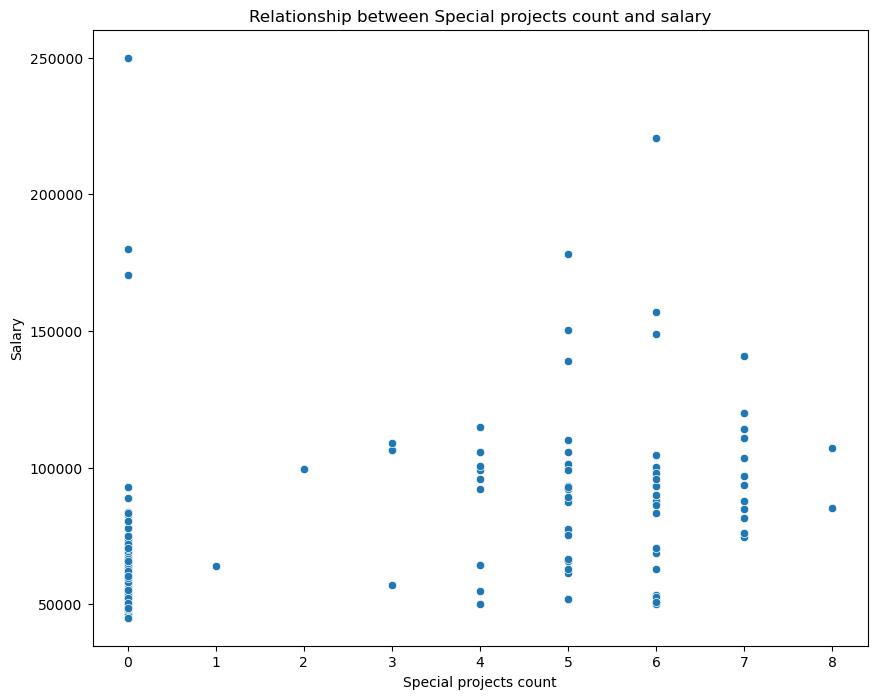

In [62]:
#What is the relationship between number of projects (SpecialProjectsCount) and salary?
x = data['SpecialProjectsCount']
y = data['Salary']

plt.figure(figsize=(10,8))
sns.scatterplot(x=x, y=y, data=data)
plt.xlabel("Special projects count")
plt.ylabel("Salary")
plt.title("Relationship between Special projects count and salary")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6564\3381191360.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x, y=y, data=data, ci=None)


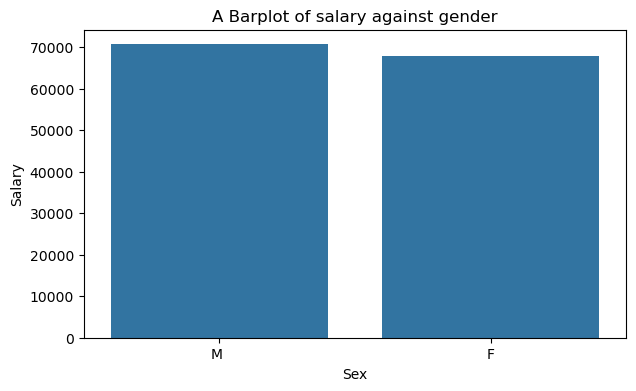

In [63]:
#Do married employees earn more on average than single employees?
x = data['Sex']
y = data['Salary']

plt.figure(figsize=(7,4))
sns.barplot(x=x, y=y, data=data, ci=None)
plt.xlabel("Sex")
plt.ylabel("Salary")
plt.title("A Barplot of salary against gender")
plt.show()

In [64]:
#Which managers have the largest teams?
team_numbers = data['ManagerName'].value_counts().sort_values(ascending=False)
print(team_numbers)

ManagerName
Michael Albert        22
Kissy Sullivan        22
Elijiah Gray          22
Kelley Spirea         22
Brannon Miller        22
David Stanley         21
Webster Butler        21
Ketsia Liebig         21
Amy Dunn              21
Janet King            19
Simon Roup            17
John Smith            14
Peter Monroe          14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Brandon R. LeBlanc     7
Jennifer Zamora        7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: count, dtype: int64


### Data Visualization

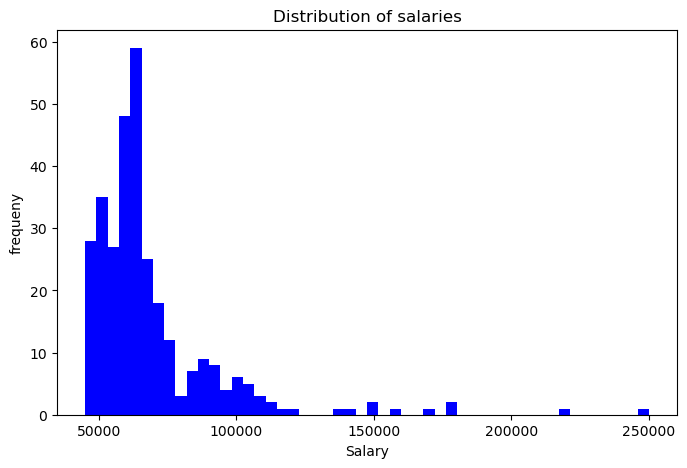

In [65]:
#Plot the salary distribution using histograms.
x = data['Salary']

plt.figure(figsize=(8,5))
plt.hist(x=x, bins=50, color="blue")
plt.xlabel("Salary")
plt.ylabel("frequeny")
plt.title("Distribution of salaries")
plt.show()

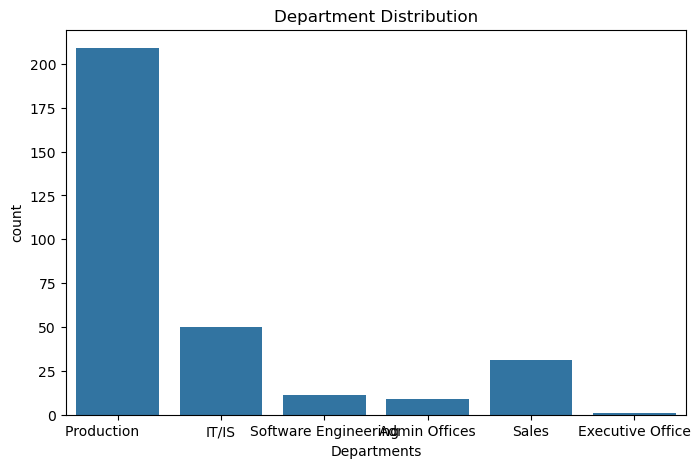

In [66]:
#Show the count of employees by department
#Which departments have the most employees?
x = data['Department']

plt.figure(figsize=(8,5))
sns.countplot(x=x)
plt.xlabel("Departments")
plt.ylabel("count")
plt.title("Department Distribution")
plt.show()

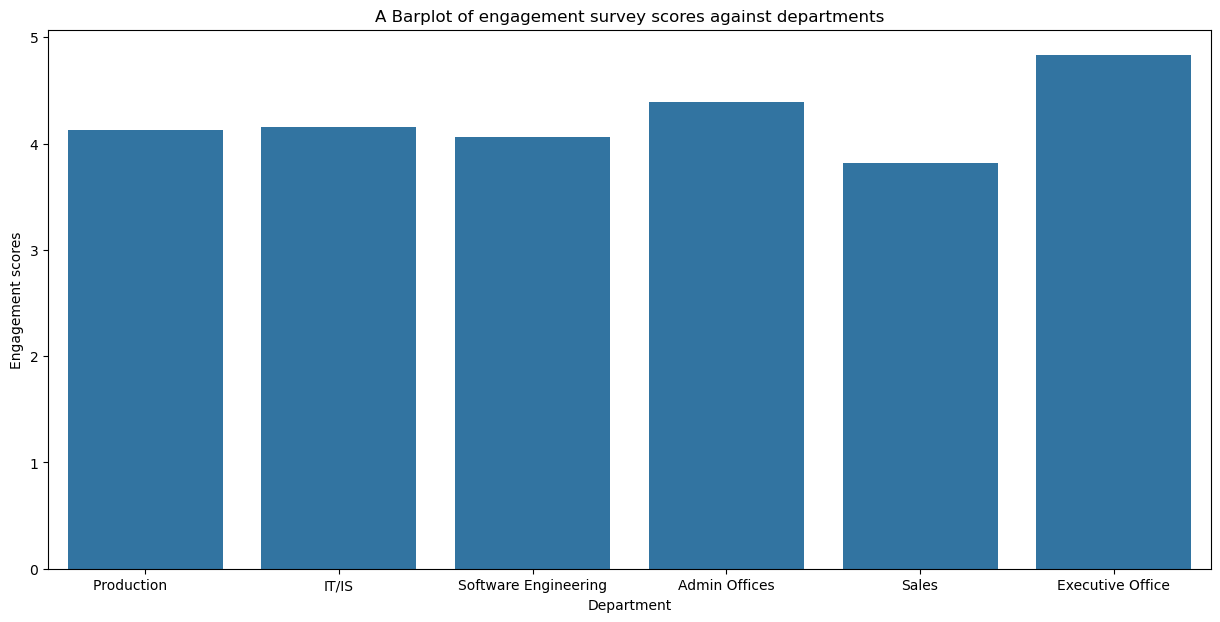

In [67]:
#Compare average satisfaction score by department.
x = data['Department']
y = data['EngagementSurvey']

plt.figure(figsize=(15,7))
sns.barplot(x=x, y=y, data=data, errorbar=None)
plt.xlabel("Department")
plt.ylabel("Engagement scores")
plt.title("A Barplot of engagement survey scores against departments")
plt.show()

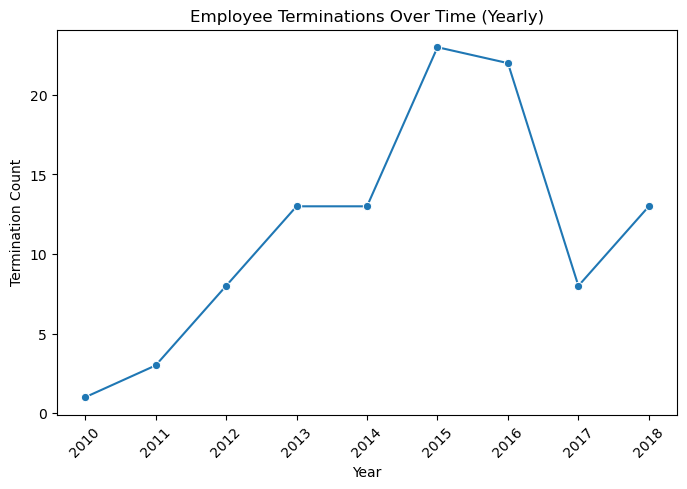

In [68]:
#Visualize employee terminations over time.
data['DateofTermination'] = pd.to_datetime(data['DateofTermination'])
data['Year'] = data['DateofTermination'].dt.year

# Count terminations per year
termination_count_yearly = data.groupby('Year').size()

# Plot line graph
plt.figure(figsize=(8,5))
sns.lineplot(x=termination_count_yearly.index, y=termination_count_yearly.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Termination Count")
plt.title("Employee Terminations Over Time (Yearly)")
plt.xticks(rotation=45)
plt.show()



In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

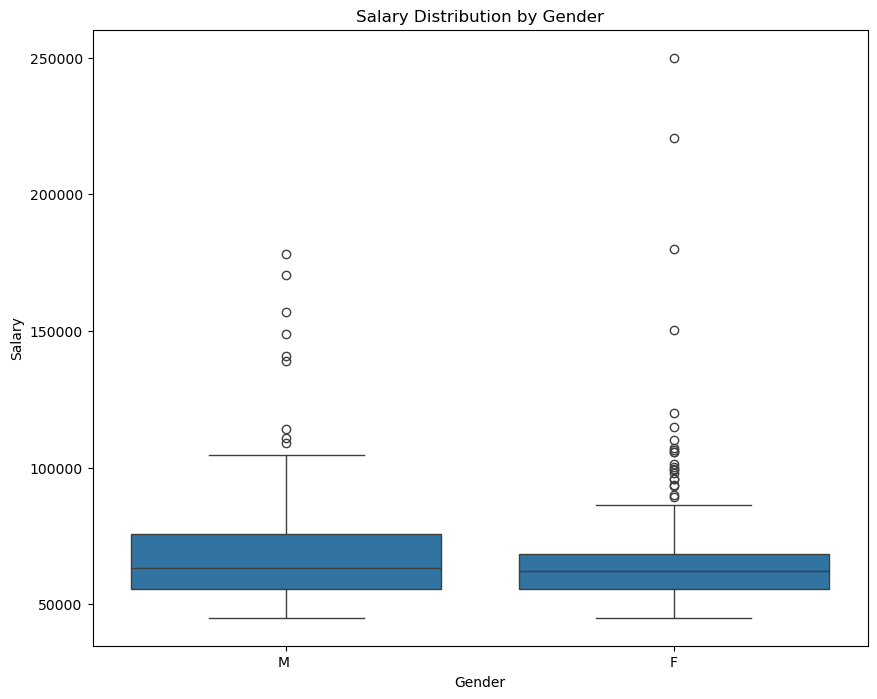

In [70]:
#Plot average salary by gender using a boxplot.

plt.figure(figsize=(10,8))
sns.boxplot(data = data,x="Sex", y="Salary")
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.title("Salary Distribution by Gender")
plt.show()

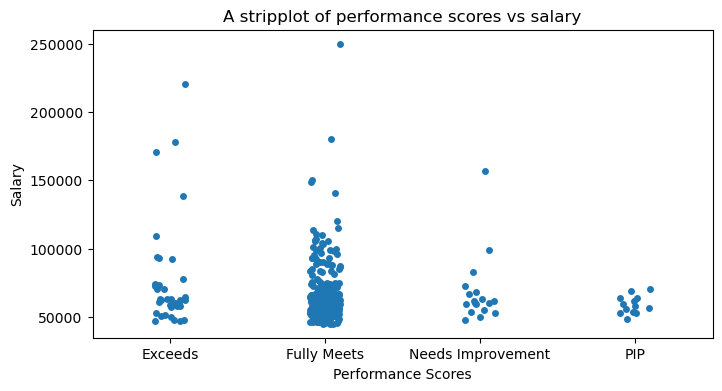

In [71]:
#Visualize performance scores vs salary.

plt.figure(figsize = (8,4))
sns.stripplot(data=data, x="PerformanceScore", y="Salary", jitter=True)
plt.xlabel("Performance Scores")
plt.ylabel("Salary")
plt.title("A stripplot of performance scores vs salary")
plt.show()

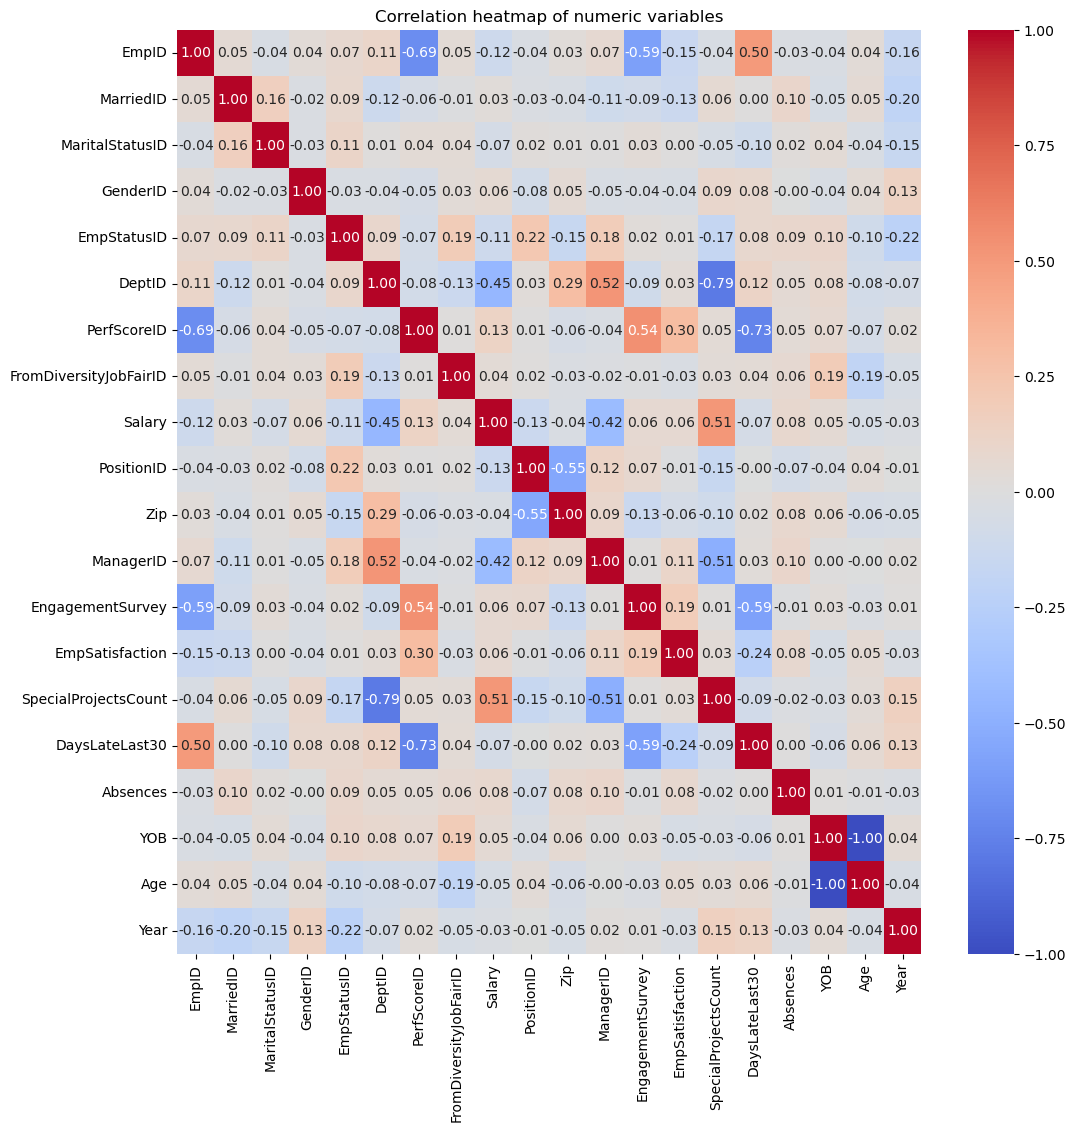

In [72]:
#Create a heatmap of correlations between numeric variables.
num_data = data.select_dtypes(include=["int32", "int64", "float64"]).drop(columns=["Termd"])
corr = num_data.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap of numeric variables")
plt.show()


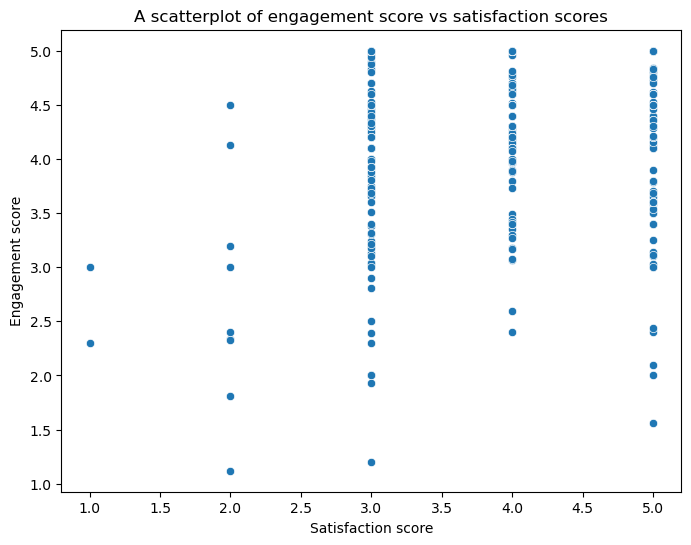

In [73]:
#Plot engagement survey score vs satisfaction score.
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, y="EngagementSurvey", x="EmpSatisfaction")
plt.ylabel("Engagement score")
plt.xlabel("Satisfaction score")
plt.title("A scatterplot of engagement score vs satisfaction scores")
plt.show()

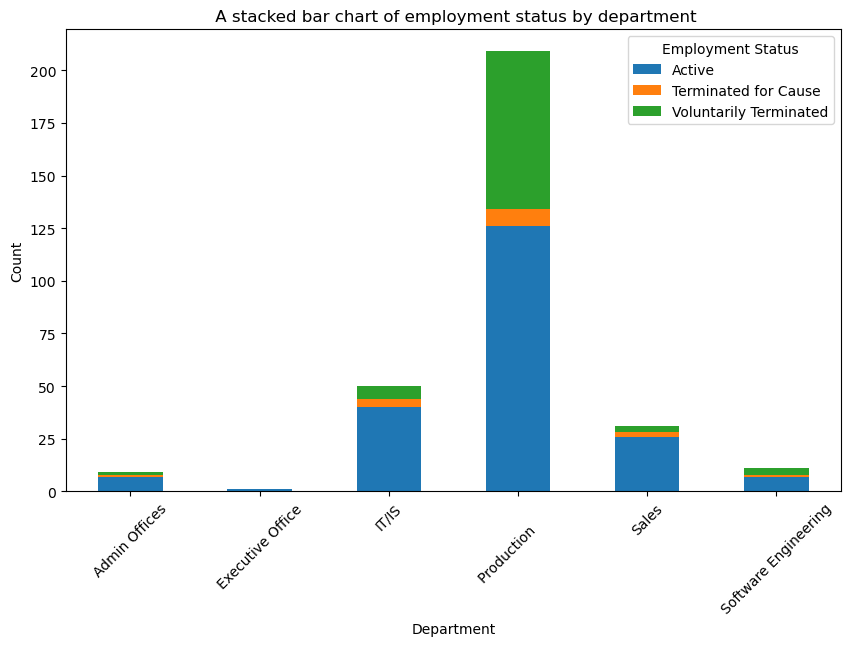

In [74]:
#Show a stacked bar chart of employee status across departments
emp_status_dept = data.groupby(["Department", "EmploymentStatus"]).size().unstack(fill_value=0)

emp_status_dept.plot(kind="bar", stacked=True, figsize=(10,6))
plt.xlabel("Department")
plt.ylabel("Count")
plt.title(" A stacked bar chart of employment status by department")
plt.legend(title="Employment Status")
plt.xticks(rotation=45)
plt.show()



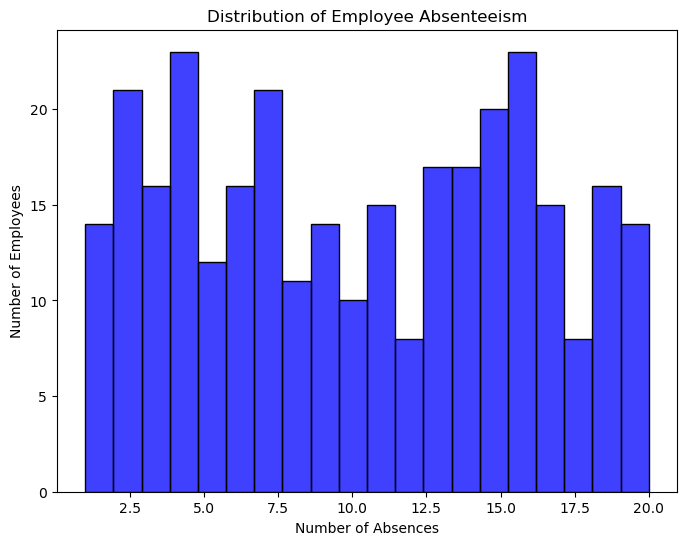

In [75]:
#Plot absenteeism distribution among employees.
plt.figure(figsize=(8,6))
sns.histplot(data=data, x="Absences", bins=20, color="blue")
plt.title("Distribution of Employee Absenteeism")
plt.xlabel("Number of Absences")
plt.ylabel("Number of Employees")
plt.show()


### PCA (Dimensionality Reduction)

In [76]:
#Standardize numerical features before applying PCA.
num_cols = data.select_dtypes(include=['Int64', 'Int32', 'Float64'])

df = pd.DataFrame(num_cols)
x = df.drop(["EmpStatusID", "Year", "EmpID"], axis=1)
y = df["EmpStatusID"]

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled.head()


,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,YOB,Age
0,-0.814311,-0.860434,1.141798,0.359667,1.744516,-0.320682,-0.259382,-0.708813,0.346725,-0.272225,0.768413,0.621302,1.222022,-0.519538,-0.320937,-1.580979,-0.644828,0.644828
1,1.228033,0.201451,1.141798,-1.489199,0.038401,-0.320682,1.410101,1.410810,1.634263,-0.261088,-1.265429,1.077769,-0.981160,2.038398,-0.320937,1.157257,-0.852402,0.852402
2,1.228033,0.201451,-0.875811,0.359667,0.038401,-0.320682,-0.161875,1.410810,0.507667,-0.281111,0.542431,-1.382080,-0.981160,-0.519538,-0.320937,-1.238699,-0.515095,0.515095
3,1.228033,0.201451,-0.875811,0.359667,0.038401,-0.320682,-0.160442,-0.708813,0.346725,-0.276609,0.090466,0.925613,1.222022,-0.519538,-0.320937,0.814977,-0.515095,0.515095
4,-0.814311,1.263336,-0.875811,0.359667,0.038401,-0.320682,-0.724461,1.410810,0.346725,-0.259844,2.689264,1.128487,0.120431,-0.519538,-0.320937,-1.409839,-0.489148,0.489148


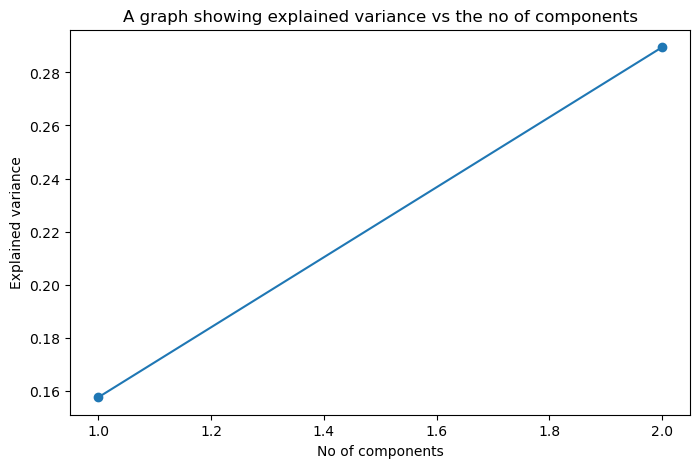

In [77]:
#Perform PCA on the dataset and explain the first 2 components.
#The first two components explain about 30% of the total variance in the dataset. Survey-related variables such as engagement and satisfaction contribute strongly to one factor, suggesting it represents overall employee attitudes. Salary and years of employment contribute more to the other factor, which can be interpreted as employee retention. This reduction helps simplify the data while still retaining key patterns that describe employee profiles.
pca = PCA(n_components=2)
x_pca = pca.fit(x_scaled)

plt.figure(figsize=(8,5))
plt.plot(range(1,len(x_pca.explained_variance_ratio_)+1),
         x_pca.explained_variance_ratio_.cumsum(), marker="o")
plt.xlabel("No of components")
plt.ylabel("Explained variance")
plt.title("A graph showing explained variance vs the no of components")
plt.show()

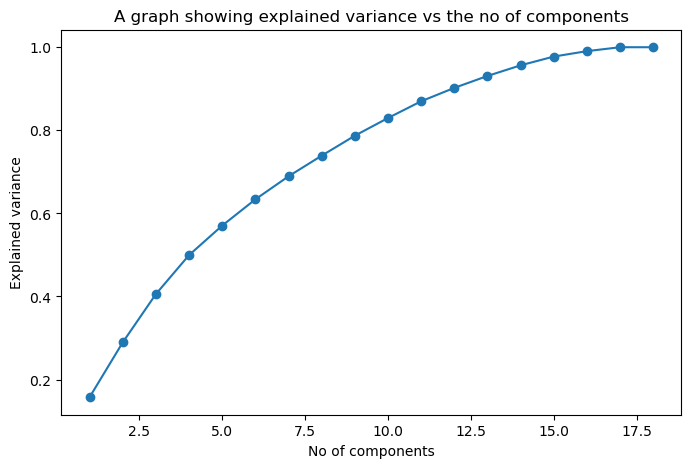

In [78]:
#Plot the explained variance ratio for the PCA components.
pca = PCA()
x_pca = pca.fit(x_scaled)

plt.figure(figsize=(8,5))
plt.plot(range(1,len(x_pca.explained_variance_ratio_)+1),
         x_pca.explained_variance_ratio_.cumsum(), marker="o")
plt.xlabel("No of components")
plt.ylabel("Explained variance")
plt.title("A graph showing explained variance vs the no of components")
plt.show()

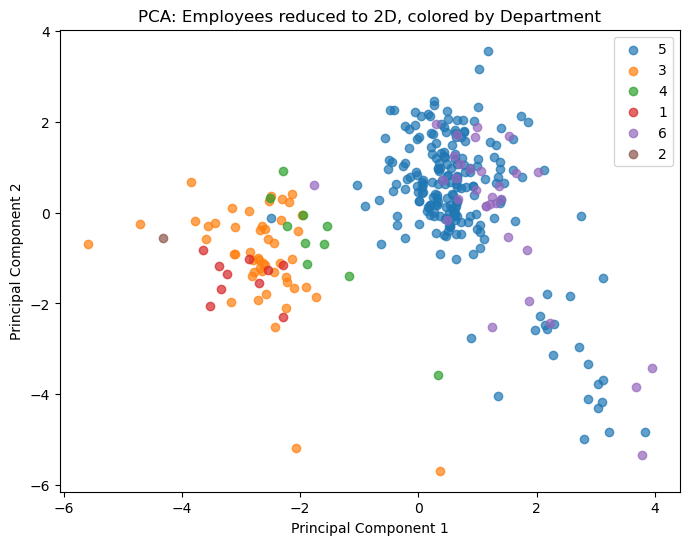

In [79]:
#Reduce the dataset to 2 dimensions with PCA and plot employees colored by department.
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(data=x_pca, columns=["PC1", "PC2"])
pca_df["DeptID"] = data["DeptID"].values 
plt.figure(figsize=(8,6))
for dept in pca_df["DeptID"].unique():
    subset = pca_df[pca_df["DeptID"] == dept]
    plt.scatter(subset["PC1"], subset["PC2"], label=dept, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Employees reduced to 2D, colored by Department")
plt.legend()
plt.show()

In [80]:
#Which variables contribute most to the first principal component?
loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=x.columns
)

print("\nFeature contribution to PC1 and PC2:")
print(loadings.value_counts())


Feature contribution to PC1 and PC2:
PC1        PC2      
-0.471210  -0.227253    1
-0.390558  -0.119265    1
-0.265797   0.466826    1
-0.220058   0.422458    1
-0.093985   0.248133    1
-0.044843  -0.122243    1
-0.032457   0.026970    1
-0.029158  -0.117195    1
-0.018589  -0.252712    1
 0.013363   0.083637    1
 0.018589   0.252712    1
 0.020732   0.042156    1
 0.061640   0.090648    1
 0.131629  -0.016330    1
 0.133636   0.034641    1
 0.273245  -0.456886    1
 0.383932   0.224563    1
 0.480889   0.203476    1
Name: count, dtype: int64


Explained variance ratio: [0.39958328 0.33535499 0.26506173]
Cumulative explained variance: [0.39958328 0.73493827 1.        ]


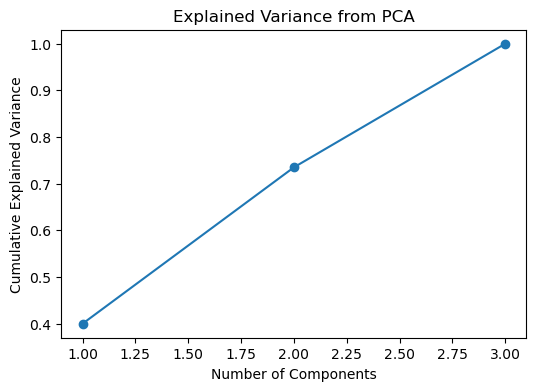

In [81]:
#Apply PCA to engagement + satisfaction + absences. Do these condense into 1 dimension?
features = ["EngagementSurvey", "EmpSatisfaction", "Absences"]
x = data[features]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA()
x_pca = pca.fit_transform(x_scaled)

explained_var = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_var)
print("Cumulative explained variance:", explained_var.cumsum())

plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_var)+1), explained_var.cumsum(), marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance from PCA")
plt.show()


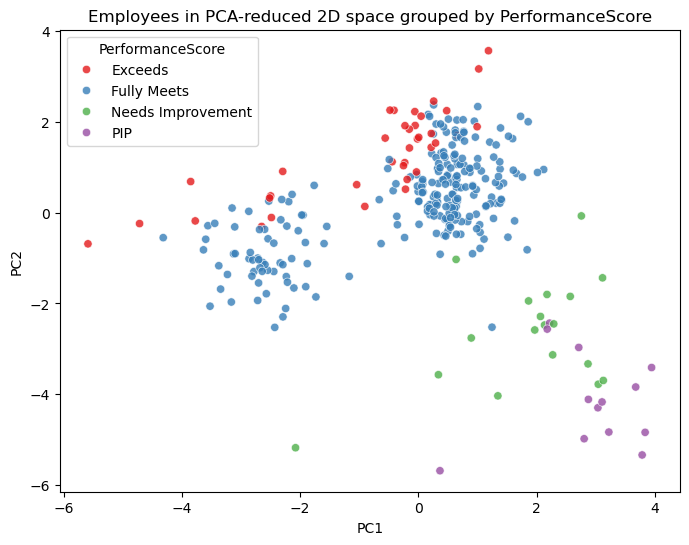

In [82]:
#Visualize employees in PCA-reduced 2D space grouped by PerformanceScore.
num_cols = data.select_dtypes(include=['Int64', 'Int32', 'Float64'])

df = pd.DataFrame(num_cols)
x = df.drop(["EmpStatusID","Year", "EmpID"], axis=1)
y= df["EmpStatusID"]

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled.head()

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(x_pca, columns=["PC1", "PC2"])
pca_df["PerformanceScore"] = data["PerformanceScore"].values

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="PerformanceScore", palette="Set1", alpha=0.8)
plt.title("Employees in PCA-reduced 2D space grouped by PerformanceScore")
plt.show()


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score (before PCA): 0.11878830223362148
Silhouette Score (after PCA): 0.5986700045833281


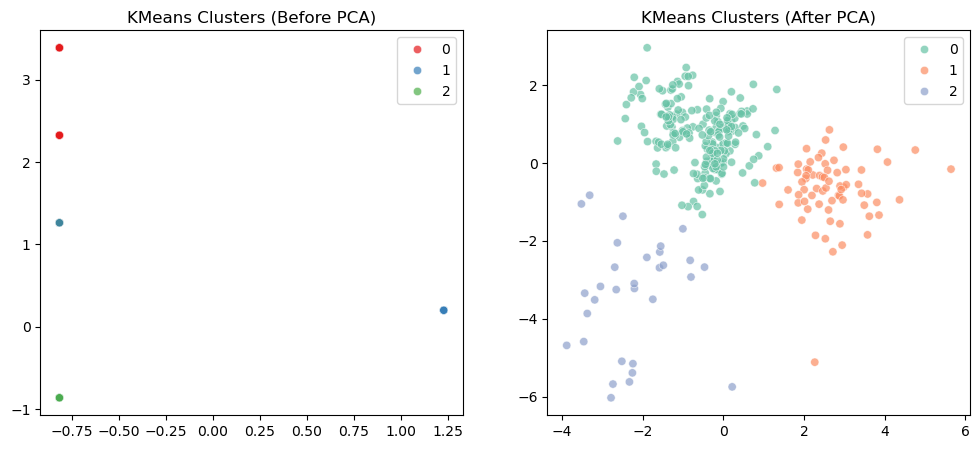

In [83]:
#Compare clustering before and after PCA using k-means on numeric data
num_cols = data.select_dtypes(include=["int64", "float64"])
x = pd.DataFrame(num_cols)
x = x.drop(["Year", "EmpID"], axis=1)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

kmeans_before = KMeans(n_clusters=3, random_state=42)
clusters_before = kmeans_before.fit_predict(x_scaled)

sil_before = silhouette_score(x_scaled, clusters_before)
print("Silhouette Score (before PCA):", sil_before)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

kmeans_after = KMeans(n_clusters=3, random_state=42)
clusters_after = kmeans_after.fit_predict(x_pca)

sil_after = silhouette_score(x_pca, clusters_after)
print("Silhouette Score (after PCA):", sil_after)

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(x=x_scaled[:,0], y=x_scaled[:,1], hue=clusters_before, palette="Set1", ax=axes[0], alpha=0.7)
axes[0].set_title("KMeans Clusters (Before PCA)")
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=clusters_after, palette="Set2", ax=axes[1], alpha=0.7)
axes[1].set_title("KMeans Clusters (After PCA)")
plt.show()

#The silhouette score before PCA was 0.1188, indicating very weak and overlapping clusters, while after PCA it improved to 0.5987, showing much clearer and well-separated clusters. This comparison demonstrates that PCA enhanced clustering performance by reducing noise and redundancy, highlighting the most informative patterns in the data. Overall, PCA made the employee groups more distinct and meaningful, improving the quality of insights drawn from clustering.



Loadings for PC1 and PC2:
                       PC1       PC2
Salary            0.721163  0.019746
Absences          0.553347 -0.617837
EngagementSurvey  0.416811  0.786058


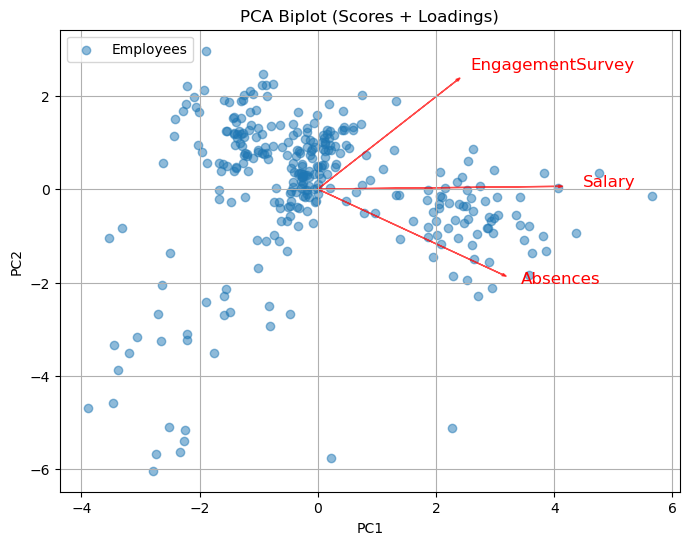

In [84]:
#Plot loadings of salary, absences, and engagement on the first 2 PCs.
features = ["Salary", "Absences", "EngagementSurvey"]
x = data[features]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
pca.fit(x_scaled)

loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=features
)

print("\nLoadings for PC1 and PC2:")
print(loadings)

plt.figure(figsize=(8,6))

plt.scatter(x_pca[:,0], x_pca[:,1], alpha=0.5, label="Employees")


for feature in features:
    plt.arrow(0, 0, 
              loadings.loc[feature, "PC1"]*max(x_pca[:,0]), 
              loadings.loc[feature, "PC2"]*max(x_pca[:,1]), 
              color="red", alpha=0.7, head_width=0.05)
    plt.text(loadings.loc[feature, "PC1"]*max(x_pca[:,0])*1.1, 
             loadings.loc[feature, "PC2"]*max(x_pca[:,1])*1.1, 
             feature, color="red", fontsize=12)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot (Scores + Loadings)")
plt.grid(True)
plt.legend()
plt.show()

### Discuss when PCA is appropriate in HR analytics (e.g., reducing survey dimensions).
PCA is appropriate in HR analytics when simplifying large datasets with many related variables, such as reducing survey dimensions (e.g., condensing dozens of engagement questions into a few key factors), along with other data like salary, department, and year of employment. By transforming correlated variables into fewer components, PCA makes data easier to interpret, reduces redundancy, avoids multicollinearity, improves clustering or segmentation, and enables clearer visualization of employee patterns without losing much information.
